### Creating All Dump Files

In [1]:
import pandas as pd
import sqlite3

def csv_to_sql_dump(csv_file_path, output_sql_file_path, table_name):
    try:
        df = pd.read_csv(csv_file_path)
        conn = sqlite3.connect(":memory:")
        print("conn  ",conn)
        df.to_sql(table_name, conn, if_exists="replace", index=False)
        with open(output_sql_file_path, "w") as f:
            for line in conn.iterdump():
                f.write(f"{line}\n")
        print(f"SQL dump has been written to {output_sql_file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        conn.close()

csv_to_sql_dump(
    csv_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\branches.csv",
    output_sql_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\branches_Dump.sql",
    table_name="Branch_Data")

csv_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\accountsdata.csv"
output_sql_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\accountsdata_Dump.sql"
table_name="accounts_data"
csv_to_sql_dump(csv_file_path, output_sql_file_path,table_name)

csv_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\customer_data.csv"
output_sql_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\customer_data_Dump.sql"
table_name="customer_data"
csv_to_sql_dump(csv_file_path, output_sql_file_path,table_name)

csv_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\kyc.csv"
output_sql_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\kyc_Dump.sql"
table_name="kyc_data"
csv_to_sql_dump(csv_file_path, output_sql_file_path,table_name)

csv_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\loans.csv"
output_sql_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\loans_Dump.sql"
table_name="loans_data"
csv_to_sql_dump(csv_file_path, output_sql_file_path,table_name)

csv_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\payments.csv"
output_sql_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\payments_Dump.sql"
table_name="payments_data"
csv_to_sql_dump(csv_file_path, output_sql_file_path,table_name)

csv_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\transactionsdata.csv"
output_sql_file_path=r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\transactionsdata_Dump.sql"
table_name="transactions_data"
csv_to_sql_dump(csv_file_path, output_sql_file_path,table_name)

conn   <sqlite3.Connection object at 0x000002A44A310B80>
SQL dump has been written to C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\branches_Dump.sql
conn   <sqlite3.Connection object at 0x000002A43A130220>
SQL dump has been written to C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\accountsdata_Dump.sql
conn   <sqlite3.Connection object at 0x000002A43A130220>
SQL dump has been written to C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\customer_data_Dump.sql
conn   <sqlite3.Connection object at 0x000002A43A130220>
SQL dump has been written to C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\kyc_Dump.sql
conn   <sqlite3.Connection object at 0x000002A43A130220>
SQL dump has been written to C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\loans_Dump.sql
conn   <sqlite3.Connection object at 0x000002A43A130220>
SQL dump has been written to C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\payments_Dump.sql
conn   <sqlite3.Connection object at 0x

In [2]:
import mysql.connector
from mysql.connector import Error

def connect_to_database():
    try:
        connection = mysql.connector.connect(
            user = 'root',
            host = 'localhost',
            database='finance_project',
            password = 'mysql@1722'
        )

        if connection.is_connected():
            print("Connected to the finance_project database")
            return connection
    except Error as e:
        print(f"Error: {e}")
        return None

# Calling the fn. to connect
db_connection = connect_to_database()

# Closing the connection after completion
if db_connection:
    db_connection.close()
    print("Database connection closed")

Connected to the finance_project database
Database connection closed


In [3]:
import mysql.connector
from mysql.connector import Error

def import_sql_dump(db_connection, sql_file_path):
    """Imports SQL dump file into the specified database.

    Args:
        db_connection: A MySQL database connection object.
        sql_file_path: Path to the SQL dump file.
    """

    try:
        cursor = db_connection.cursor()
        with open(sql_file_path, 'r') as f:
            sql_script = f.read()
        cursor.execute(sql_script, multi=True)
        db_connection.commit()
        print(f"SQL dump imported successfully from {sql_file_path}")
    except Error as e:
        print(f"Error importing SQL dump: {e}")
    finally:
        cursor.close()

# Establish database connection
db_connection = connect_to_database()

# List of SQL dump files
sql_files = [
    r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\branches_Dump.sql",
    r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\accountsdata_Dump.sql",
    r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\customer_data_Dump.sql", 
    r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\kyc_Dump.sql", 
    r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\loans_Dump.sql", 
    r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\payments_Dump.sql",
    r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\transactionsdata_Dump.sql"
]

# Import each SQL dump file
for sql_file in sql_files:
    import_sql_dump(db_connection, sql_file)

# Close the database connection
db_connection.close()

Connected to the finance_project database
SQL dump imported successfully from C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\branches_Dump.sql
SQL dump imported successfully from C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\accountsdata_Dump.sql
SQL dump imported successfully from C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\customer_data_Dump.sql
SQL dump imported successfully from C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\kyc_Dump.sql
SQL dump imported successfully from C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\loans_Dump.sql
SQL dump imported successfully from C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\payments_Dump.sql
SQL dump imported successfully from C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\transactionsdata_Dump.sql


## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Accounts dataset

#### Step-1 : Data Understanding

In [2]:
account_df = pd.read_csv(r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\accountsdata.csv")
account_df

,account_id,customer_id,branch_id,account_type,balance
0,261.0,780.0,9.0,Savings,39823.92
1,NaN,NaN,NaN,Savings,29520.04
2,846.0,711.0,5.0,Savings,48574.25
3,5.0,226.0,9.0,Savings,3631.82
4,89.0,923.0,2.0,Current,3463.25
...,...,...,...,...,...
1049,331.0,856.0,5.0,Savings,15573.92
1050,467.0,246.0,10.0,Savings,1784.18
1051,122.0,111.0,5.0,Savings,14402.99
1052,982.0,784.0,3.0,Savings,22647.17


In [3]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    1043 non-null   float64
 1   customer_id   1043 non-null   float64
 2   branch_id     1043 non-null   float64
 3   account_type  1054 non-null   object 
 4   balance       1054 non-null   float64
dtypes: float64(4), object(1)
memory usage: 41.3+ KB


In [4]:
account_df.describe()

,account_id,customer_id,branch_id,balance
count,1043.000000,1043.000000,1043.000000,1054.000000
mean,499.881112,505.144775,5.473634,25631.211376
std,299.427091,293.175220,2.868524,14142.712068
min,1.000000,1.000000,1.000000,-4.000000
25%,239.500000,250.000000,3.000000,13494.860000
50%,500.000000,506.000000,5.000000,25913.790000
75%,760.500000,769.500000,8.000000,37605.367500
max,1000.000000,1000.000000,10.000000,49999.930000


In [5]:
account_df.shape

(1054, 5)

In [6]:
account_df.dtypes

account_id      float64
customer_id     float64
branch_id       float64
account_type     object
balance         float64
dtype: object

In [7]:
account_df_copy = account_df.copy()

### Step-2 Data Cleaning

#### 2.1 Handeling Null

In [8]:
account_df.isnull().sum()

account_id      11
customer_id     11
branch_id       11
account_type     0
balance          0
dtype: int64

In [9]:
account_df.isnull().sum().sum()

np.int64(33)

In [10]:
account_df.dropna(inplace=True)

In [11]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1053
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    1043 non-null   float64
 1   customer_id   1043 non-null   float64
 2   branch_id     1043 non-null   float64
 3   account_type  1043 non-null   object 
 4   balance       1043 non-null   float64
dtypes: float64(4), object(1)
memory usage: 48.9+ KB


In [12]:
account_df.shape

(1043, 5)

#### 2.2 Hendeling Duplicates

In [13]:
print(account_df.duplicated().sum())

43


In [15]:
def analyze_dataframe(df):

  column_names = df.columns.tolist()
  duplicate_counts = {}

  for column in column_names:
    duplicate_counts[column] = df[column].duplicated().sum()

  return {
      "column_names": column_names,
      "duplicate_counts": duplicate_counts}

In [16]:
print(analyze_dataframe(account_df))

{'column_names': ['account_id', 'customer_id', 'branch_id', 'account_type', 'balance'], 'duplicate_counts': {'account_id': np.int64(43), 'customer_id': np.int64(398), 'branch_id': np.int64(1033), 'account_type': np.int64(1041), 'balance': np.int64(43)}}


In [17]:
account_df.drop_duplicates(inplace=True)

In [18]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1053
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    1000 non-null   float64
 1   customer_id   1000 non-null   float64
 2   branch_id     1000 non-null   float64
 3   account_type  1000 non-null   object 
 4   balance       1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 46.9+ KB


In [19]:
account_df.shape

(1000, 5)

In [20]:
account_df.dtypes

account_id      float64
customer_id     float64
branch_id       float64
account_type     object
balance         float64
dtype: object

In [21]:
account_df['account_id'] = account_df['account_id'].astype(int)

In [22]:
account_df['customer_id'] = account_df['customer_id'].astype(int)

In [23]:
account_df['branch_id'] = account_df['branch_id'].astype(int)

In [24]:
account_df.dtypes

account_id        int64
customer_id       int64
branch_id         int64
account_type     object
balance         float64
dtype: object

In [25]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1053
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    1000 non-null   int64  
 1   customer_id   1000 non-null   int64  
 2   branch_id     1000 non-null   int64  
 3   account_type  1000 non-null   object 
 4   balance       1000 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 46.9+ KB


In [26]:
account_df.describe()

,account_id,customer_id,branch_id,balance
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,503.157000,5.456000,25598.766740
std,288.819436,293.558101,2.878254,14088.862318
min,1.000000,1.000000,1.000000,1044.740000
25%,250.750000,248.750000,3.000000,13551.780000
50%,500.500000,505.000000,5.000000,25741.040000
75%,750.250000,768.250000,8.000000,37548.770000
max,1000.000000,1000.000000,10.000000,49999.930000


#### -------------------------------Accounts Data Cleaning completed-----------------------------------

### Branches Dataset

In [27]:
branches_df = pd.read_csv(r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\branches.csv")
branches_df

,branch_id,branch_name,branch_address
0,1,O11r,41101P
1,2,N12n,41102Q
2,3,R13n,41103R
3,4,P14i,41104S
4,5,Y15a,41105T
5,6,B16a,41106U
6,7,R17i,41107V
7,8,V18a,41108W
8,9,S19i,41109X
9,10,M20i,411010Y


In [28]:
branches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   branch_id       10 non-null     int64 
 1   branch_name     10 non-null     object
 2   branch_address  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


### Customer Dataset

#### Step-1 Understanding Data

In [29]:
customer_df = pd.read_csv(r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\customer_data.csv")
customer_df

,customer_id,first_name,last_name,email,phone,address
0,583.0,Raghav,Sane,jagdish86@example.com,9.150000e+11,"570\nDara Street, Chennai-240844"
1,514.0,Abhiram,Suresh,abhiram46@example.net,9.180000e+11,"110, Dhillon Ganj\nFirozabad 757923"
2,41.0,Mohini,Khare,aadisane@example.net,6.424635e+09,H.No. 072\nMistry Nagar\nShivpuri-529503
3,847.0,Avi,Lanka,mmadan@example.net,8.212147e+09,"719, Karpe Ganj\nGandhidham-140189"
4,500.0,Azad,Ravi,bishakha09@example.org,9.190000e+11,"728, Zachariah Circle, Chandrapur-478829"
...,...,...,...,...,...,...
1129,559.0,Ayush,Apte,devansh87@example.net,9.529537e+09,"78/44, Bhandari Marg, Mangalore-887955"
1130,27.0,Anay,Bajaj,bahadurjit92@example.org,9.100000e+11,H.No. 61\nVarty Zila\nSrikakulam-922364
1131,700.0,Yug,Atwal,chasmum89@example.com,9.160000e+11,"H.No. 71, Mall Ganj, Sri Ganganagar-873115"
1132,646.0,Simon,Sidhu,sanaya27@example.org,3.425246e+09,"H.No. 33\nSastry, Vadodara 655911"


In [30]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1124 non-null   float64
 1   first_name   1132 non-null   object 
 2   last_name    1127 non-null   object 
 3   email        1119 non-null   object 
 4   phone        1129 non-null   float64
 5   address      1123 non-null   object 
dtypes: float64(2), object(4)
memory usage: 53.3+ KB


In [31]:
customer_df.describe()

,customer_id,phone
count,1124.000000,1.129000e+03
mean,512.323843,3.345591e+11
std,496.303976,4.375203e+11
min,1.000000,-1.000000e+03
25%,239.750000,3.782770e+09
50%,496.500000,7.865452e+09
75%,749.250000,9.130000e+11
max,10012.000000,9.200000e+11


In [32]:
customer_df.shape

(1134, 6)

In [33]:
customer_df.dtypes

customer_id    float64
first_name      object
last_name       object
email           object
phone          float64
address         object
dtype: object

In [34]:
customer_df_copy = customer_df.copy()

#### Step-2 Data Cleaning

#### 2.1 Null Handeling

In [35]:
customer_df.drop(['phone'], axis=1, inplace=True)

In [36]:
customer_df.isnull().sum()

customer_id    10
first_name      2
last_name       7
email          15
address        11
dtype: int64

In [37]:
print(customer_df.isnull().sum().sum())

45


In [38]:
customer_df.dropna(inplace=True)

In [39]:
customer_df.shape

(1119, 5)

In [40]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1119 entries, 0 to 1133
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1119 non-null   float64
 1   first_name   1119 non-null   object 
 2   last_name    1119 non-null   object 
 3   email        1119 non-null   object 
 4   address      1119 non-null   object 
dtypes: float64(1), object(4)
memory usage: 52.5+ KB


In [41]:
customer_df.isnull().sum()

customer_id    0
first_name     0
last_name      0
email          0
address        0
dtype: int64

#### 2.2 Duplicates Handeling

In [42]:
customer_df.duplicated().sum()

np.int64(119)

In [43]:
print(analyze_dataframe(customer_df))

{'column_names': ['customer_id', 'first_name', 'last_name', 'email', 'address'], 'duplicate_counts': {'customer_id': np.int64(119), 'first_name': np.int64(662), 'last_name': np.int64(675), 'email': np.int64(119), 'address': np.int64(119)}}


In [44]:
customer_df.drop_duplicates(['customer_id'], inplace=True)

In [45]:
customer_df.drop_duplicates(['email'], inplace=True)

In [46]:
customer_df.drop_duplicates(['address'], inplace=True)

In [47]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1132
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1000 non-null   float64
 1   first_name   1000 non-null   object 
 2   last_name    1000 non-null   object 
 3   email        1000 non-null   object 
 4   address      1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 46.9+ KB


In [48]:
customer_df

,customer_id,first_name,last_name,email,address
0,583.0,Raghav,Sane,jagdish86@example.com,"570\nDara Street, Chennai-240844"
1,514.0,Abhiram,Suresh,abhiram46@example.net,"110, Dhillon Ganj\nFirozabad 757923"
2,41.0,Mohini,Khare,aadisane@example.net,H.No. 072\nMistry Nagar\nShivpuri-529503
3,847.0,Avi,Lanka,mmadan@example.net,"719, Karpe Ganj\nGandhidham-140189"
4,500.0,Azad,Ravi,bishakha09@example.org,"728, Zachariah Circle, Chandrapur-478829"
...,...,...,...,...,...
1125,647.0,Raghav,Batra,garayatin@example.net,99\nDugal Marg\nMedininagar-547618
1126,904.0,Barkha,Hayer,wmander@example.org,"H.No. 342, Salvi Nagar\nSrikakulam 441031"
1127,818.0,Vasudha,Lalla,gchander@example.net,"37/88\nMinhas Marg, Karnal 222548"
1128,39.0,Viraj,Boase,xbava@example.com,"985\nVohra Zila, Nangloi Jat 923057"


#### ---------------------------------------------------Customer Data Cleaning Done---------------------------------------------------------------

### KYC Dataset

#### Step-1 Data understanding

In [49]:
kyc_df = pd.read_csv(r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\kyc.csv")
kyc_df

,kyc_id,customer_id,aadhaar_number,kyc_status
0,1,470,802503115739,Pending
1,2,527,36860203929,Completed
2,3,909,343087684410,Completed
3,4,707,390630372457,Completed
4,5,537,860467554156,Pending
...,...,...,...,...
495,496,714,390277619686,Completed
496,497,706,967040323966,Under Review
497,498,234,954723502148,Pending
498,499,637,820675436184,Under Review


In [50]:
kyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   kyc_id          500 non-null    int64 
 1   customer_id     500 non-null    int64 
 2   aadhaar_number  500 non-null    int64 
 3   kyc_status      500 non-null    object
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [51]:
kyc_df.describe()

,kyc_id,customer_id,aadhaar_number
count,500.000000,500.000000,5.000000e+02
mean,250.500000,486.842000,4.996583e+11
std,144.481833,279.018048,2.861841e+11
min,1.000000,1.000000,2.354652e+09
25%,125.750000,247.750000,2.399115e+11
50%,250.500000,491.000000,4.893113e+11
75%,375.250000,717.250000,7.378356e+11
max,500.000000,999.000000,9.991039e+11


In [52]:
kyc_df.shape

(500, 4)

In [53]:
kyc_df.dtypes

kyc_id             int64
customer_id        int64
aadhaar_number     int64
kyc_status        object
dtype: object

### Data Cleaning

In [54]:
kyc_df.drop(['aadhaar_number'], axis=1, inplace=True)

In [55]:
kyc_df.isnull().sum()

kyc_id         0
customer_id    0
kyc_status     0
dtype: int64

In [56]:
kyc_df.duplicated().sum()

np.int64(0)

#### ------------------------------------------------------KYC dataset done--------------------------------------------------------------

### Loan Dataset

#### Step-1 Data understanding

In [57]:
loan_df = pd.read_csv(r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\loans.csv")
loan_df

,loan_id,customer_id,loan_type,loan_amount,interest_rate,loan_status
0,41.0,46.0,Auto,33255.74,9.49,Closed
1,26.0,830.0,Auto,321873.96,6.22,Active
2,235.0,134.0,Home,44524.99,5.59,Closed
3,27.0,529.0,Personal,411853.83,5.52,Active
4,486.0,354.0,Auto,414024.48,8.75,Closed
...,...,...,...,...,...,...
559,72.0,887.0,Auto,484274.04,6.32,Active
560,107.0,670.0,Personal,488043.14,8.54,Closed
561,271.0,183.0,Home,243649.75,9.06,Closed
562,436.0,504.0,Personal,314972.12,8.46,Closed


In [58]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_id        550 non-null    float64
 1   customer_id    549 non-null    float64
 2   loan_type      561 non-null    object 
 3   loan_amount    564 non-null    float64
 4   interest_rate  549 non-null    float64
 5   loan_status    563 non-null    object 
dtypes: float64(4), object(2)
memory usage: 26.6+ KB


In [59]:
loan_df.describe()

,loan_id,customer_id,loan_amount,interest_rate
count,550.000000,549.000000,564.000000,549.000000
mean,231.238182,520.342441,257338.525674,7.464062
std,152.057868,284.892705,141711.900535,1.426339
min,1.000000,1.000000,4000.000000,5.000000
25%,89.250000,280.000000,134851.795000,6.270000
50%,226.500000,529.000000,266336.255000,7.470000
75%,363.750000,778.000000,371277.760000,8.670000
max,510.000000,998.000000,499987.640000,9.980000


In [60]:
loan_df.shape

(564, 6)

In [61]:
loan_df.dtypes

loan_id          float64
customer_id      float64
loan_type         object
loan_amount      float64
interest_rate    float64
loan_status       object
dtype: object

#### Step-2 Data Cleaning

#### Null Handeling

In [62]:
loan_df.isnull().sum()

loan_id          14
customer_id      15
loan_type         3
loan_amount       0
interest_rate    15
loan_status       1
dtype: int64

In [63]:
print(loan_df.isnull().sum().sum())

48


In [64]:
loan_df.dropna(inplace=True)

In [65]:
loan_df.isnull().sum()

loan_id          0
customer_id      0
loan_type        0
loan_amount      0
interest_rate    0
loan_status      0
dtype: int64

In [66]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 0 to 563
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_id        549 non-null    float64
 1   customer_id    549 non-null    float64
 2   loan_type      549 non-null    object 
 3   loan_amount    549 non-null    float64
 4   interest_rate  549 non-null    float64
 5   loan_status    549 non-null    object 
dtypes: float64(4), object(2)
memory usage: 30.0+ KB


In [67]:
loan_df.duplicated().sum()

np.int64(49)

In [68]:
loan_df.drop_duplicates(inplace=True)

In [69]:
loan_df.duplicated().sum()

np.int64(0)

#### Changing Datatypes

In [70]:
loan_df['loan_id'] = loan_df['loan_id'].astype(int)

In [71]:
loan_df['customer_id'] = loan_df['customer_id'].astype(int)

In [72]:
loan_df.dtypes

loan_id            int64
customer_id        int64
loan_type         object
loan_amount      float64
interest_rate    float64
loan_status       object
dtype: object

### -----------------------------------------------Loan Dataset Done----------------------------------------------------------------

### Payments Dataset

In [73]:
payments_df = pd.read_csv(r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\payments.csv")
payments_df

,payment_id,loan_id,payment_amount
0,1,146,4173.75
1,2,83,4760.15
2,3,148,2155.38
3,4,36,1231.63
4,5,367,1019.98
...,...,...,...
1995,1996,421,2593.86
1996,1997,263,4460.65
1997,1998,304,2864.80
1998,1999,334,3719.09


In [74]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   payment_id      2000 non-null   int64  
 1   loan_id         2000 non-null   int64  
 2   payment_amount  2000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 47.0 KB


In [75]:
payments_df.describe()

,payment_id,loan_id,payment_amount
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,250.284500,2953.050530
std,577.494589,145.377119,1182.320543
min,1.000000,1.000000,1001.930000
25%,500.750000,126.750000,1899.715000
50%,1000.500000,251.500000,2938.540000
75%,1500.250000,379.250000,4013.655000
max,2000.000000,500.000000,4996.020000


#### Null handeling

In [76]:
payments_df.isnull().sum()

payment_id        0
loan_id           0
payment_amount    0
dtype: int64

#### Duplicates handeling

In [77]:
payments_df.duplicated().sum()

np.int64(0)

### -------------------------------------------Payments Dataset completed-------------------------------------------------------

### Transaction Dataset

#### Data Understanding

In [78]:
transaction_df = pd.read_csv(r"C:\Users\PC\OneDrive\Documents\My docs\NMD\Live project\transactionsdata.csv")
transaction_df

,transaction_id,account_id,transaction_type,amount
0,1302,178,Deposit,3896.27
1,592,769,Withdrawal,3813.22
2,1074,791,Withdrawal,665.38
3,1804,493,Withdrawal,1927.07
4,30,518,Deposit,1981.06
...,...,...,...,...
2056,1639,299,Deposit,1470.71
2057,1096,926,Withdrawal,2133.12
2058,1131,512,Deposit,689.72
2059,1295,657,Withdrawal,786.11


In [79]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    2061 non-null   int64  
 1   account_id        2061 non-null   int64  
 2   transaction_type  2061 non-null   object 
 3   amount            2061 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 64.5+ KB


In [80]:
transaction_df.describe()

,transaction_id,account_id,amount
count,2061.000000,2061.000000,2061.000000
mean,972.782145,501.960213,2715.416162
std,590.622904,286.338586,1299.404268
min,1.000000,1.000000,501.430000
25%,455.000000,260.000000,1593.640000
50%,970.000000,509.000000,2679.030000
75%,1485.000000,749.000000,3813.220000
max,2000.000000,1000.000000,4997.960000


In [81]:
transaction_df.shape

(2061, 4)

In [82]:
transaction_df.dtypes

transaction_id        int64
account_id            int64
transaction_type     object
amount              float64
dtype: object

#### Null handeling

In [83]:
transaction_df.isnull().sum()

transaction_id      0
account_id          0
transaction_type    0
amount              0
dtype: int64

#### Duplicates handeling

In [84]:
transaction_df.duplicated().sum()

np.int64(61)

In [85]:
print(analyze_dataframe(transaction_df))

{'column_names': ['transaction_id', 'account_id', 'transaction_type', 'amount'], 'duplicate_counts': {'transaction_id': np.int64(61), 'account_id': np.int64(1191), 'transaction_type': np.int64(2059), 'amount': np.int64(65)}}


In [86]:
transaction_df.drop_duplicates(inplace=True)

In [87]:
transaction_df.duplicated().sum()

np.int64(0)

In [88]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 2060
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    2000 non-null   int64  
 1   account_id        2000 non-null   int64  
 2   transaction_type  2000 non-null   object 
 3   amount            2000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 78.1+ KB


### ----------------------------------------------Transaction Data Cleaning Done-------------------------------------------------

## Grouping and Merging of Datasets

### 1. Customer - Account

In [89]:
customer_df.merge(account_df)

,customer_id,first_name,last_name,email,address,account_id,branch_id,account_type,balance
0,583.0,Raghav,Sane,jagdish86@example.com,"570\nDara Street, Chennai-240844",713,10,Savings,48342.49
1,847.0,Avi,Lanka,mmadan@example.net,"719, Karpe Ganj\nGandhidham-140189",970,4,Savings,26393.87
2,847.0,Avi,Lanka,mmadan@example.net,"719, Karpe Ganj\nGandhidham-140189",254,10,Savings,27506.37
3,502.0,Max,Bhat,seshadridalbir@example.net,"773\nMaster, Bhalswa Jahangir Pur 811115",934,6,Savings,14060.56
4,502.0,Max,Bhat,seshadridalbir@example.net,"773\nMaster, Bhalswa Jahangir Pur 811115",168,4,Savings,41205.97
...,...,...,...,...,...,...,...,...,...
995,742.0,Yauvani,Kari,quincy61@example.com,"90/805, Kothari Street, Ajmer 811449",989,6,Savings,21862.17
996,371.0,Pranit,Sarna,ishitamorar@example.org,"95, Balay Road, Anantapur 658175",868,5,Savings,44289.01
997,752.0,Faqid,Jain,cchakrabarti@example.com,91\nKannan Zila\nSikar-638874,287,6,Savings,30952.90
998,647.0,Raghav,Batra,garayatin@example.net,99\nDugal Marg\nMedininagar-547618,915,9,Savings,14818.51


In [90]:
customer_df.merge(account_df).isnull().sum()

customer_id     0
first_name      0
last_name       0
email           0
address         0
account_id      0
branch_id       0
account_type    0
balance         0
dtype: int64

In [91]:
print(customer_df.merge(account_df).duplicated().sum())

0


### 2. Account - Branch

In [92]:
account_df.merge(branches_df)

,account_id,customer_id,branch_id,account_type,balance,branch_name,branch_address
0,261,780,9,Savings,39823.92,S19i,41109X
1,846,711,5,Savings,48574.25,Y15a,41105T
2,5,226,9,Savings,3631.82,S19i,41109X
3,89,923,2,Current,3463.25,N12n,41102Q
4,458,837,3,Savings,4798.15,R13n,41103R
...,...,...,...,...,...,...,...
995,88,179,5,Savings,13657.11,Y15a,41105T
996,331,856,5,Savings,15573.92,Y15a,41105T
997,467,246,10,Savings,1784.18,M20i,411010Y
998,122,111,5,Savings,14402.99,Y15a,41105T


In [93]:
account_df.merge(branches_df).isna().sum()

account_id        0
customer_id       0
branch_id         0
account_type      0
balance           0
branch_name       0
branch_address    0
dtype: int64

In [94]:
print(account_df.merge(branches_df).duplicated().sum())

0


### 3. Customer - KYC

In [95]:
customer_df.merge(kyc_df)

,customer_id,first_name,last_name,email,address,kyc_id,kyc_status
0,583.0,Raghav,Sane,jagdish86@example.com,"570\nDara Street, Chennai-240844",242,Pending
1,41.0,Mohini,Khare,aadisane@example.net,H.No. 072\nMistry Nagar\nShivpuri-529503,104,Completed
2,500.0,Azad,Ravi,bishakha09@example.org,"728, Zachariah Circle, Chandrapur-478829",35,Under Review
3,502.0,Max,Bhat,seshadridalbir@example.net,"773\nMaster, Bhalswa Jahangir Pur 811115",160,Pending
4,668.0,Raagini,Saha,hkapur@example.com,"148, Dutta Nagar, Morbi-877032",34,Pending
...,...,...,...,...,...,...,...
495,511.0,George,Lala,vedant09@example.net,"190, Bawa, Aligarh 077275",82,Pending
496,75.0,Kamala,Vala,nakshchoudhry@example.com,"90, Sengupta Zila\nShahjahanpur 994267",208,Completed
497,371.0,Pranit,Sarna,ishitamorar@example.org,"95, Balay Road, Anantapur 658175",55,Completed
498,279.0,Nidhi,Sama,ubikachoudhury@example.com,45/96\nGola Street\nAmravati 859499,83,Completed


In [96]:
customer_df.merge(kyc_df).isna().sum()

customer_id    0
first_name     0
last_name      0
email          0
address        0
kyc_id         0
kyc_status     0
dtype: int64

In [97]:
print(customer_df.merge(kyc_df).duplicated().sum())

0


### 4. Customer - Loan

In [98]:
customer_df.merge(loan_df)

,customer_id,first_name,last_name,email,address,loan_id,loan_type,loan_amount,interest_rate,loan_status
0,583.0,Raghav,Sane,jagdish86@example.com,"570\nDara Street, Chennai-240844",311,Personal,82235.81,9.34,Active
1,583.0,Raghav,Sane,jagdish86@example.com,"570\nDara Street, Chennai-240844",490,Personal,121314.55,7.21,Closed
2,514.0,Abhiram,Suresh,abhiram46@example.net,"110, Dhillon Ganj\nFirozabad 757923",55,Home,32128.65,8.02,Active
3,514.0,Abhiram,Suresh,abhiram46@example.net,"110, Dhillon Ganj\nFirozabad 757923",218,Personal,304610.38,8.70,Closed
4,41.0,Mohini,Khare,aadisane@example.net,H.No. 072\nMistry Nagar\nShivpuri-529503,42,Auto,465058.76,5.39,Active
...,...,...,...,...,...,...,...,...,...,...
495,279.0,Nidhi,Sama,ubikachoudhury@example.com,45/96\nGola Street\nAmravati 859499,192,Home,45017.99,5.00,Active
496,674.0,Fitan,Bose,riyathakkar@example.org,"31/06\nGoswami Nagar, Gandhidham 534332",80,Home,42039.36,7.47,Active
497,988.0,Veer,Som,hkar@example.com,H.No. 28\nSha Chowk\nCuttack-527559,272,Auto,485583.93,6.65,Closed
498,39.0,Viraj,Boase,xbava@example.com,"985\nVohra Zila, Nangloi Jat 923057",117,Personal,432759.71,8.05,Closed


In [99]:
customer_df.merge(loan_df).isna().sum()

customer_id      0
first_name       0
last_name        0
email            0
address          0
loan_id          0
loan_type        0
loan_amount      0
interest_rate    0
loan_status      0
dtype: int64

In [100]:
print(customer_df.merge(loan_df).duplicated().sum())

0


### 5. Loan - Payments

In [101]:
payments_df.merge(loan_df)

,payment_id,loan_id,payment_amount,customer_id,loan_type,loan_amount,interest_rate,loan_status
0,1,146,4173.75,648,Personal,482007.06,7.18,Closed
1,2,83,4760.15,806,Home,284073.92,6.01,Active
2,3,148,2155.38,752,Auto,233613.15,7.89,Active
3,4,36,1231.63,280,Personal,15785.99,9.24,Active
4,5,367,1019.98,70,Personal,252764.01,7.45,Closed
...,...,...,...,...,...,...,...,...
1995,1996,421,2593.86,971,Auto,304431.47,5.06,Closed
1996,1997,263,4460.65,887,Home,191842.91,9.30,Active
1997,1998,304,2864.80,97,Home,485241.02,5.96,Closed
1998,1999,334,3719.09,271,Auto,421818.62,7.52,Closed


In [102]:
payments_df.merge(loan_df).isna().sum()

payment_id        0
loan_id           0
payment_amount    0
customer_id       0
loan_type         0
loan_amount       0
interest_rate     0
loan_status       0
dtype: int64

In [103]:
print(payments_df.merge(loan_df).duplicated().sum())

0


### 6. Account - Transactions

In [104]:
account_df.merge(transaction_df)

,account_id,customer_id,branch_id,account_type,balance,transaction_id,transaction_type,amount
0,261,780,9,Savings,39823.92,790,Withdrawal,4958.93
1,261,780,9,Savings,39823.92,9,Withdrawal,2194.14
2,846,711,5,Savings,48574.25,1190,Withdrawal,2081.64
3,846,711,5,Savings,48574.25,1986,Withdrawal,1508.35
4,5,226,9,Savings,3631.82,583,Deposit,4138.82
...,...,...,...,...,...,...,...,...
1995,467,246,10,Savings,1784.18,1251,Withdrawal,1666.65
1996,122,111,5,Savings,14402.99,199,Deposit,723.90
1997,122,111,5,Savings,14402.99,725,Withdrawal,2891.45
1998,861,126,1,Savings,49541.05,928,Withdrawal,1169.78


In [105]:
account_df.merge(transaction_df).isna().sum()

account_id          0
customer_id         0
branch_id           0
account_type        0
balance             0
transaction_id      0
transaction_type    0
amount              0
dtype: int64

In [106]:
account_df.merge(transaction_df).duplicated().sum()

np.int64(0)

# Insights Visualization

### Branch Performance Analysis

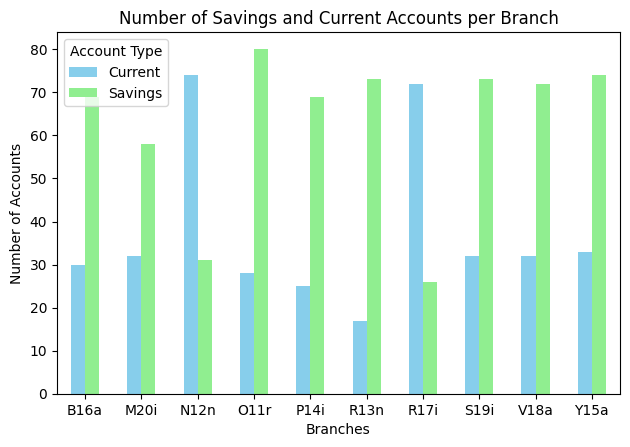

In [107]:
# Total number of Savings and Current Accounts per Branch
acc_br = account_df.merge(branches_df)
acc_br_df = pd.DataFrame(acc_br)
account_counts = acc_br_df.groupby('branch_name')['account_type'].value_counts().unstack()

account_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Branches')
plt.ylabel('Number of Accounts')
plt.title('Number of Savings and Current Accounts per Branch')
plt.legend(title='Account Type')
plt.tight_layout()
plt.xticks(rotation=0) 
plt.show()

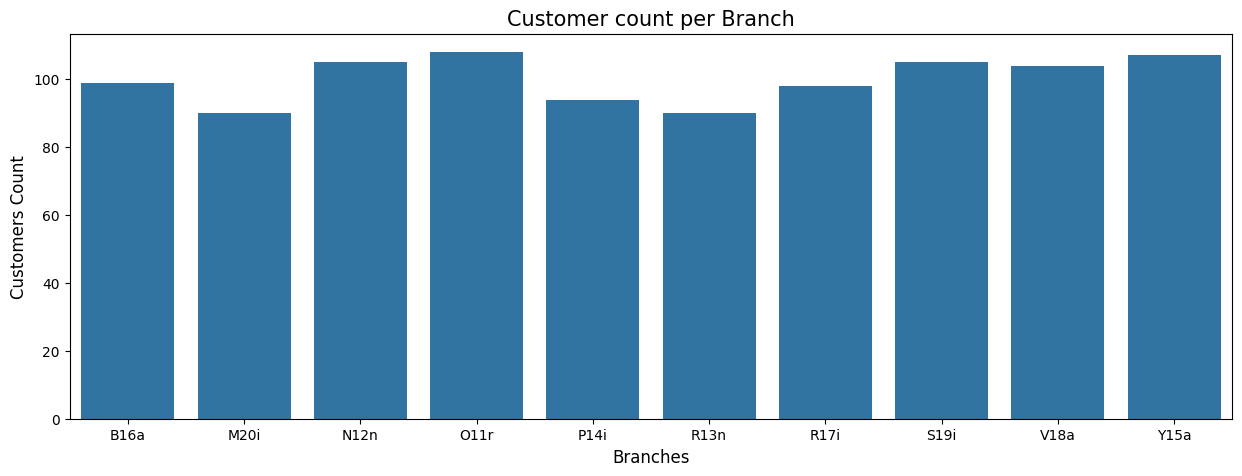

In [108]:
# Customer count per Branch
customer_per_branch = acc_br_df.groupby("branch_name")["customer_id"].count().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(data= customer_per_branch, x="branch_name", y= "customer_id")
plt.title("Customer count per Branch", fontsize= 15)
plt.xlabel("Branches", fontsize= 12)
plt.ylabel("Customers Count", fontsize=12)
plt.show()

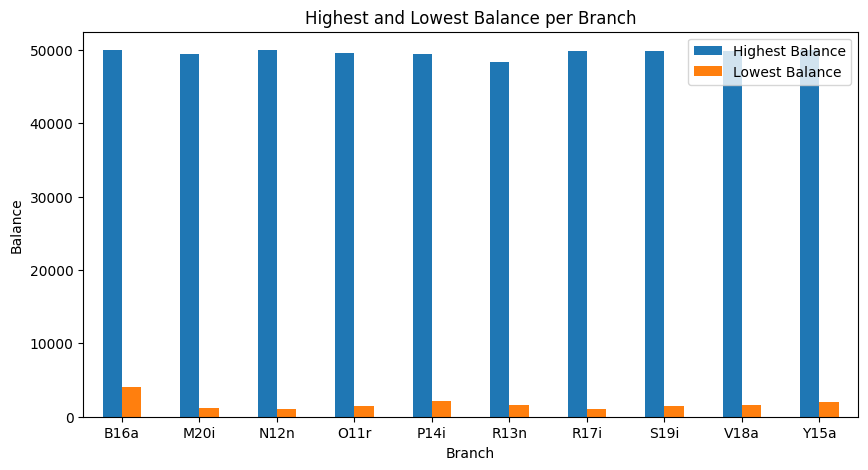

In [109]:
# Highest and lowest balance per branch
top_customers = acc_br_df.groupby('branch_name')['balance'].max()
bottom_customers = acc_br_df.groupby('branch_name')['balance'].min()

result_df = pd.DataFrame({'Branch': top_customers.index,
                           'Highest Balance': top_customers.values,
                           'Lowest Balance': bottom_customers.values})

result_df.plot(x='Branch', kind='bar', figsize=(10, 5))
plt.title('Highest and Lowest Balance per Branch')
plt.ylabel('Balance')
plt.xlabel('Branch')
plt.xticks(rotation=0)
plt.show()

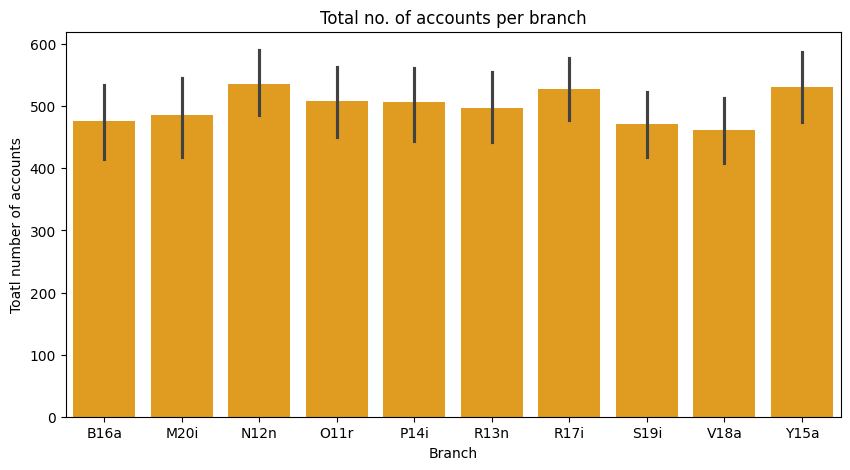

In [110]:
# Total number of acconts per branch
total_no_acc = acc_br_df.groupby('branch_name')['account_id'].value_counts().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=total_no_acc, x='branch_name', y='account_id', color='orange')
plt.title('Total no. of accounts per branch')
plt.xlabel('Branch')
plt.ylabel('Toatl number of accounts')
plt.xticks(rotation=0)
plt.show()

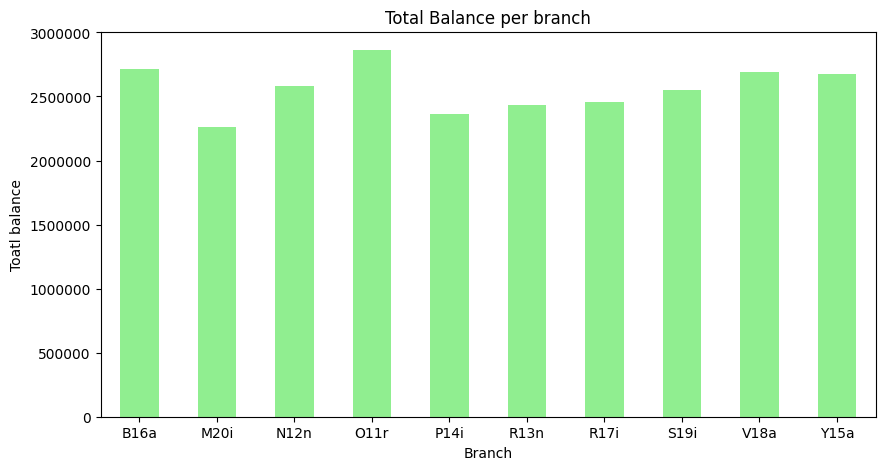

In [111]:
# Total Balance of all accounts per branch
total_bal_per_branch = acc_br_df.groupby('branch_name')['balance'].sum()

plt.figure(figsize=(10,5))
total_bal_per_branch.plot(kind='bar', figsize=(10,5), color='lightgreen')
plt.title('Total Balance per branch')
plt.xlabel('Branch')
plt.ylabel('Toatl balance')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)
plt.show()

<Figure size 1500x2000 with 0 Axes>

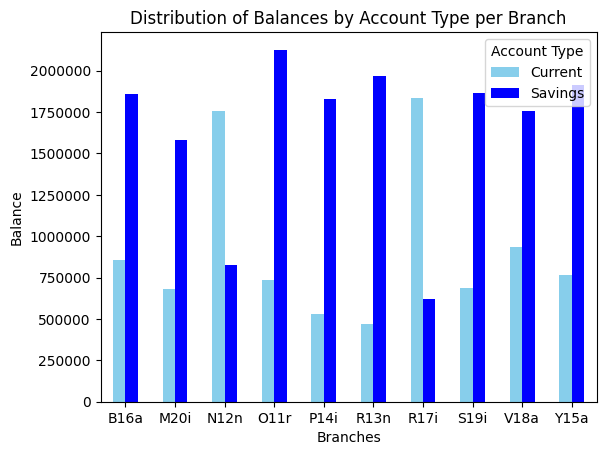

In [112]:
# Balances across different account types per branch
types_bal_per_branch = acc_br_df.groupby(['branch_name', 'account_type'])['balance'].sum().unstack()

plt.figure(figsize=(15,20))
types_bal_per_branch.plot(kind='bar', color=['skyblue', 'blue'])
plt.xlabel('Branches')
plt.ylabel('Balance')
plt.title('Distribution of Balances by Account Type per Branch')
plt.legend(title='Account Type')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)
plt.show()

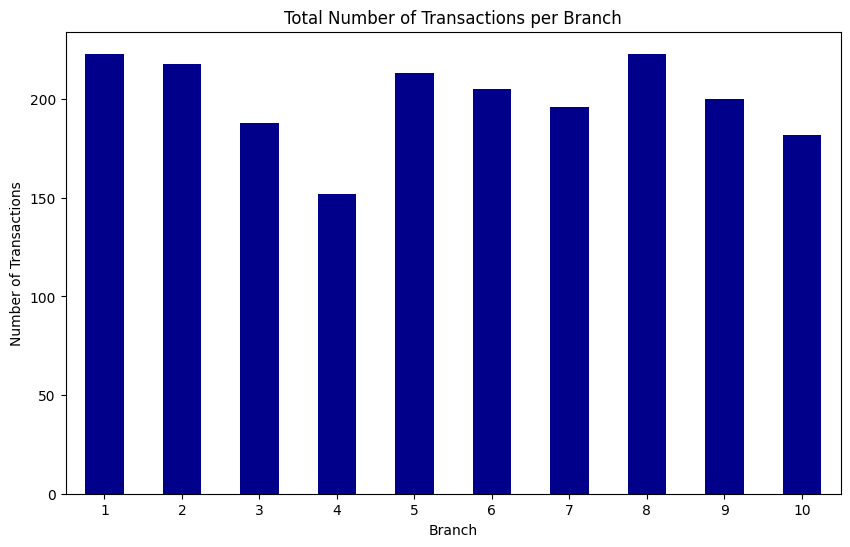

In [113]:
# Total no. of transactions processed per branch
acc_tran = account_df.merge(transaction_df)
acc_tran_df = pd.DataFrame(acc_tran)
transaction_count_per_branch = acc_tran_df.groupby('branch_id')['transaction_id'].count()

transaction_count_per_branch.plot(kind='bar', figsize=(10, 6), color='darkblue')
plt.title('Total Number of Transactions per Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

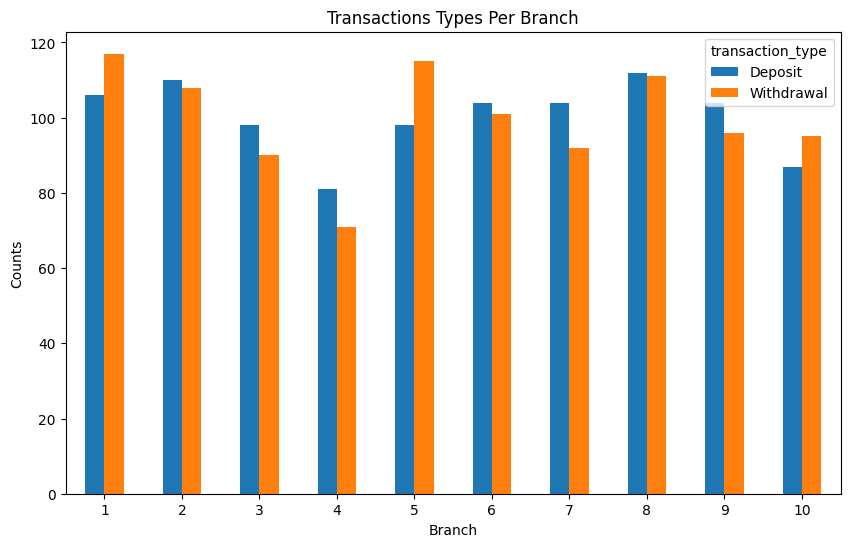

In [114]:
# Distribution of transaction types per branch (count)
transaction_types_per_branch = acc_tran_df.groupby(['branch_id', 'transaction_type'])['balance'].size().unstack()

transaction_types_per_branch.plot(kind='bar', figsize=(10, 6))
plt.title('Transactions Types Per Branch')
plt.xlabel('Branch')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

### ----------------------------------Branch Performance Analysis Done-----------------------------------

### Customer Behavior Analysis

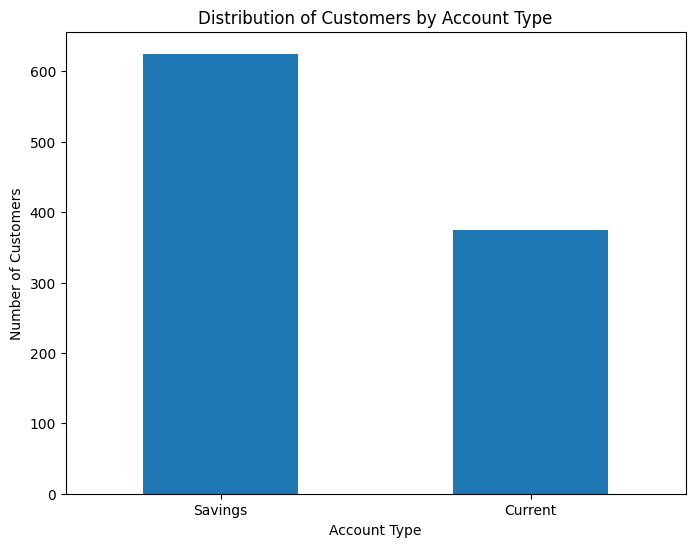

In [127]:
# Distribution of Customers by Account Type 
acc_cus = account_df.merge(customer_df)
acc_cus_df = pd.DataFrame(acc_cus)
account_type_count = acc_cus_df['account_type'].value_counts()
account_type_count.plot(kind='bar', figsize=(8,6))
plt.title('Distribution of Customers by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [117]:
# Customers having more than 1 Active loan currently
cus_loan = customer_df.merge(loan_df)
customer_counts = cus_loan.groupby('customer_id').size()
multiple_loans_customers = customer_counts[customer_counts > 1]

result_df = customer_df[customer_df['customer_id'].isin(multiple_loans_customers.index)]
final_df = result_df[['customer_id']].nunique().sum()
print(f"The number of customer having more than 1 active loan is:",final_df)

The number of customer having more than 1 active loan is: 87


In [118]:
cus_loan = customer_df.merge(loan_df)
customer_counts = cus_loan.groupby('customer_id').size()
multiple_active_loans = loan_df[loan_df['loan_status'] == 'Active'].groupby('customer_id')['loan_status'].count() > 1

# Count the number of customers with multiple active loans
count = multiple_active_loans.sum()

print("Number of customers with multiple active loans:", count)

Number of customers with multiple active loans: 23


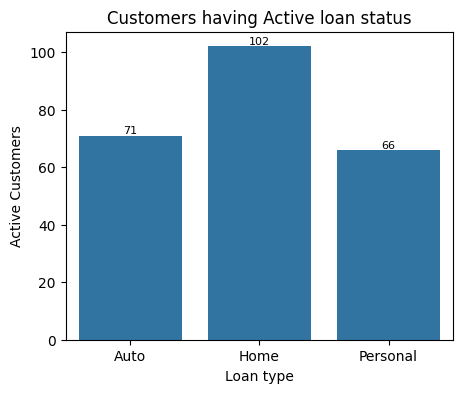

In [119]:
# Number of Customers having Active loan status
count_active_loan_customers = cus_loan[cus_loan['loan_status'] =='Active']
customer_counts_by_loan_type = count_active_loan_customers.groupby('loan_type')['customer_id'].nunique()

plt.figure(figsize=(5,4))
data_labels = sns.barplot(x=customer_counts_by_loan_type.index, y=customer_counts_by_loan_type.values) 
for container in data_labels.containers:
    data_labels.bar_label(container, label_type='edge', fontsize = 8, color='black')
plt.xlabel('Loan Type')
plt.xlabel('Loan type')
plt.ylabel('Active Customers')
plt.title('Customers having Active loan status')
plt.show()

In [120]:
# Maximum & Minimum Loan Amount
loan_pay = loan_df.merge(payments_df)
loan_pay

maximum_loan_amount = loan_pay['loan_amount'].max()
minimum_loan_amount = loan_pay['loan_amount'].min()
print("Maximum Loan Amount: ", maximum_loan_amount)
print("Minimum Loan Amount: ", minimum_loan_amount)

Maximum Loan Amount:  499987.64
Minimum Loan Amount:  12196.68


In [121]:
# Highest and Lowest interest rate for active and closed loan.
grouped_df = cus_loan.groupby(['loan_status']).agg(
    maximum_interest=('interest_rate', 'max'),
    minimum_interest=('interest_rate', 'min')
).reset_index()
print(grouped_df)

  loan_status  maximum_interest  minimum_interest
0      Active              9.98              5.00
1      Closed              9.92              5.02


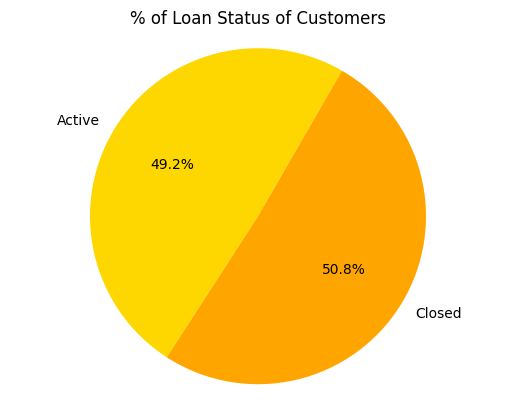

In [122]:
# Loan status of customers
grouped_df = cus_loan.groupby(['loan_status']).size().to_frame(name = 'count').reset_index()
custom_colours = ['Gold', 'Orange']
plt.pie(grouped_df['count'], labels=grouped_df['loan_status'], autopct='%1.1f%%', startangle=60, colors = custom_colours)
plt.title('% of Loan Status of Customers')
plt.axis('equal')
plt.show()

In [123]:
# Highest & Lowest Interest Rate as per loan type
grouped_df = cus_loan.groupby(['loan_type']).agg(
    maximum_interest=('interest_rate', 'max'),
    minimum_interest=('interest_rate', 'min'),
    average_interest= ('interest_rate','mean')
).reset_index()

print(grouped_df)

  loan_type  maximum_interest  minimum_interest  average_interest
0      Auto              9.96              5.05           7.38920
1      Home              9.91              5.00           7.55266
2  Personal              9.98              5.02           7.47821


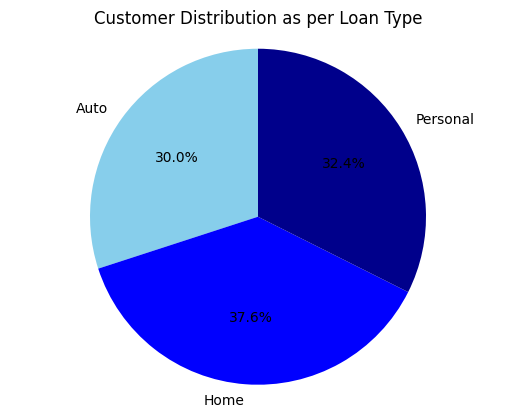

In [124]:
# Type of Loans customers are perferring most
grouped_df = cus_loan.groupby(['loan_type']).size().to_frame(name = 'count').reset_index()
plt.pie(grouped_df['count'], labels=grouped_df['loan_type'], autopct='%1.1f%%', startangle=90, colors = ['skyblue', 'blue', 'darkblue'])
plt.title('Customer Distribution as per Loan Type')
plt.axis('equal')
plt.show()

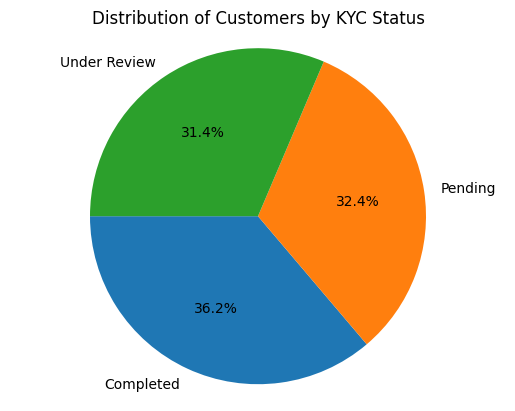

In [125]:
# KYC Status of Customers
cus_kyc = customer_df.merge(kyc_df)
cus_kyc_df= cus_kyc.groupby(['kyc_status']).size().to_frame(name = 'count').reset_index()
plt.pie(cus_kyc_df['count'], labels=cus_kyc_df['kyc_status'], autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Customers by KYC Status')
plt.axis('equal')
plt.show()